**About Dataset**

Dataset: Walmart E-commerce

**Source:** [Kaggle - Walmart E-commerce](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset)

**Overview**

Walmart is a globally recognized retail giant, renowned for offering a wide range of products at competitive prices, and providing a convenient shopping experience for millions of customers worldwide.

In this project, I aim to analyze the top-selling products and product categories on Walmart’s e-commerce platform. This project is part of my data analyst portfolio and focuses on uncovering sales trends and customer preferences.

**Key Features:**

- `Product_ID` 
- `User_ID`
- `Purchase`
- `Product_Category`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/walmart-e-commerce/walmart.csv')

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**Data Understanding and Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [5]:
def age_category(age):
  if age == '0-17':
    return 'Teenager'
  elif age == '18-25':
    return 'Young Adult'
  elif age == '26-35':
    return 'Adult'
  elif age == '36-45':
    return 'Middle-Aged Adult'
  elif age == '46-50':
    return 'Older Adults'
  elif age == '51-55':
    return 'Pre-Seniors'
  else:
    return 'Seniors'

df['Age_Category'] = df['Age'].apply(age_category)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Teenager
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Teenager
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Teenager
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Teenager
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Seniors
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,Pre-Seniors
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,Adult
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,Adult
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,Seniors


In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
Age_Category                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


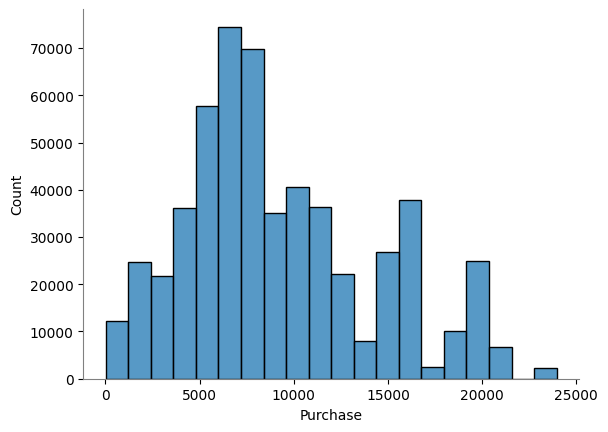

In [9]:
sns.histplot(df['Purchase'], bins=20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
plt.show()

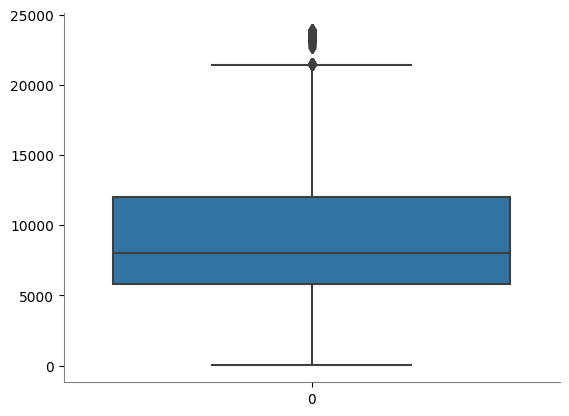

In [10]:
sns.boxplot(df['Purchase'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
plt.show()

In [11]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Purchase'] < Q1 - 1.5 * IQR) | (df['Purchase'] > Q3 + 1.5 * IQR)]
outliers.count()

User_ID                       2677
Product_ID                    2677
Gender                        2677
Age                           2677
Occupation                    2677
City_Category                 2677
Stay_In_Current_City_Years    2677
Marital_Status                2677
Product_Category              2677
Purchase                      2677
Age_Category                  2677
dtype: int64

In [12]:
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_Category
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603,Adult
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792,Middle-Aged Adult
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233,Young Adult
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595,Adult
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341,Adult
...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753,Adult
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724,Young Adult
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529,Adult
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663,Pre-Seniors


In [13]:
df['Purchase'].agg(['min', 'max'])


min       12
max    23961
Name: Purchase, dtype: int64

There are outliers, but after reviewing them, it's clear that the high sales are genuine and not due to data errors. So I decided to keep them in the analysis. There are outliers, but if you look at them, it's true that sales are high, not due to data errors, so I let them be.

**Exploratory Data Analyst**

In [14]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10)

Product_ID
P00025442    27995166
P00110742    26722309
P00255842    25168963
P00059442    24338343
P00184942    24334887
P00112142    24216006
P00110942    23639564
P00237542    23425576
P00057642    23102780
P00010742    22164153
Name: Purchase, dtype: int64

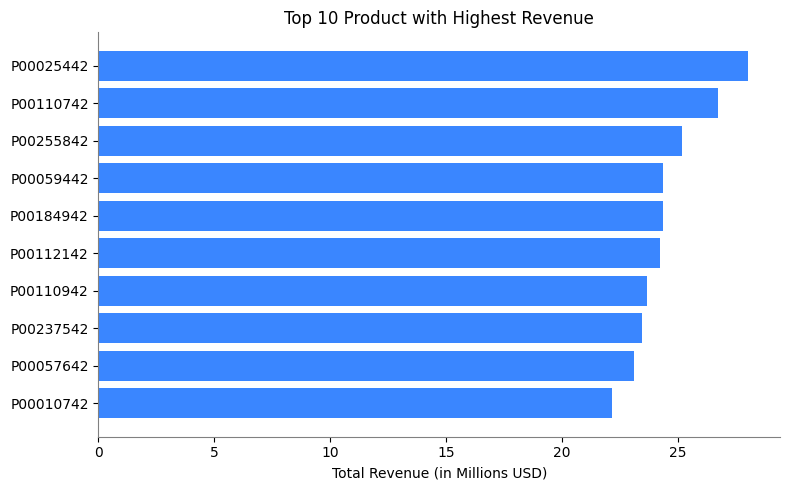

In [15]:
revenue_by_product = df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values(ascending=True)
revenue_by_product = revenue_by_product / 1e6

plt.figure(figsize=(8, 5))
plt.barh(revenue_by_product.index, revenue_by_product.values, color='#3A86FF')
plt.title('Top 10 Product with Highest Revenue')
plt.xlabel('Total Revenue (in Millions USD)')
plt.ylabel('')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()


**Top 10 Products with Highest Revenue**

Product P00025442 has the highest revenue with USD 26.7 million, followed by P00110742 (USD 26.7 million), and P00255842 (USD 25.1 million).

**Interpretation:**

Product P00025442 gives the highest revenue for the e-commerce platform. There’s no single dominating product the revenue gaps between products are small, meaning demand is evenly spread across multiple products.


In [16]:
df.groupby('Product_Category')['Purchase'].sum().nlargest(10)

Product_Category
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
Name: Purchase, dtype: int64

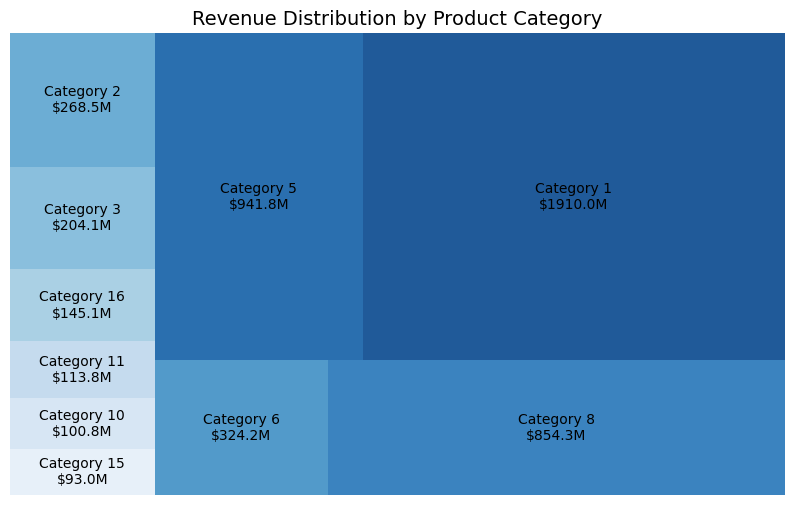

In [17]:
!pip install squarify

import squarify

sizes = df.groupby('Product_Category')['Purchase'].sum().nlargest(10).sort_values(ascending=True)

labels = [f'Category {cat}\n${val/1e6:.1f}M' for cat, val in zip(sizes.index, sizes.values)]

colors = sns.color_palette("Blues", n_colors=len(sizes))

plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=sizes.values,
    label=labels,
    color=colors,
    alpha=0.9
)
plt.axis('off')
plt.title('Revenue Distribution by Product Category', fontsize=14)
plt.show()

**Revenue Distribution by Product Category**

- Category 1: contributes 39% of total revenue  
- Category 5: USD 941.8 million  
- Category 8: USD 854.3 million


**Interpretation:**

These three categories contribute around 75% of total revenue. This shows that Walmart has a strong position in these categories.

In [18]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(5)

Product_ID
P00086242    21256.505495
P00085342    20980.268116
P00200642    20468.773234
P00116142    20463.791277
P00119342    20448.756494
Name: Purchase, dtype: float64

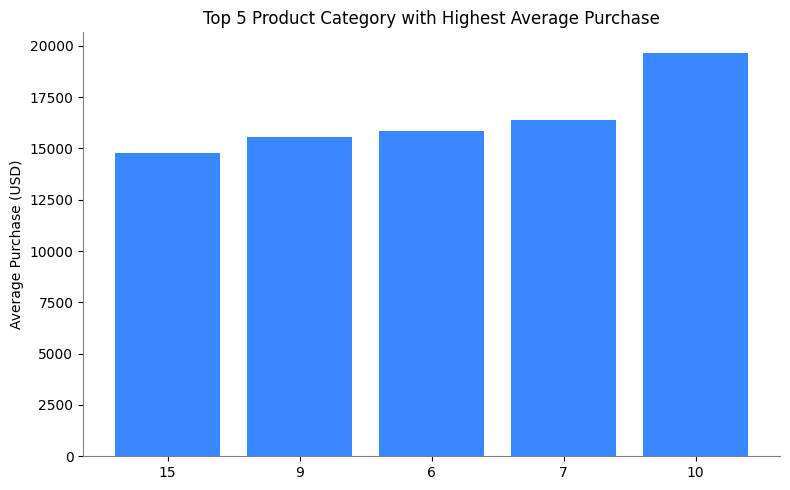

In [19]:
average_purchase_by_product_cateogry = df.groupby('Product_Category')['Purchase'].mean().nlargest(5).sort_values(ascending=True)

average_purchase_by_product_cateogry.index = average_purchase_by_product_cateogry.index.astype(str)

plt.figure(figsize=(8, 5))
plt.bar(average_purchase_by_product_cateogry.index, average_purchase_by_product_cateogry.values, color='#3A86FF')
plt.title('Top 5 Product Category with Highest Average Purchase')
plt.xlabel('')
plt.ylabel('Average Purchase (USD)')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()


In [20]:
df.groupby('Product_Category')['User_ID'].count().nlargest(5)

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
Name: User_ID, dtype: int64

In [21]:
df.groupby('Product_ID')['User_ID'].count().nlargest(5)

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: User_ID, dtype: int64

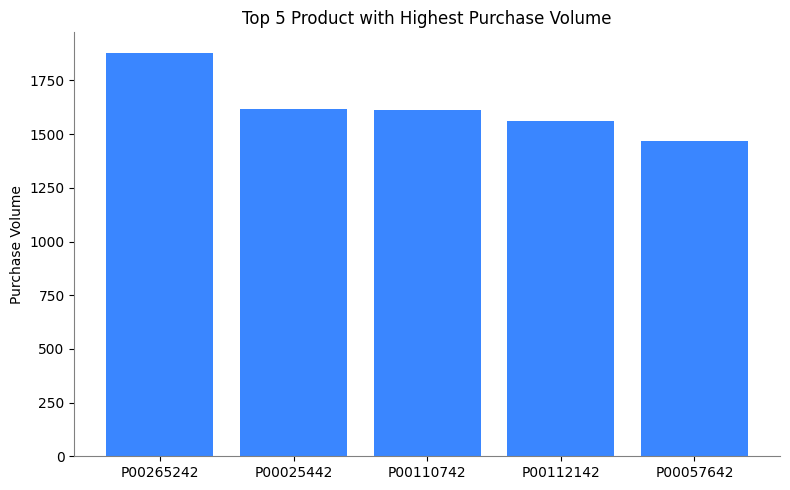

In [22]:
purchase_volume_by_product = df.groupby('Product_ID')['User_ID'].count().nlargest(5)

plt.figure(figsize=(8, 5))
plt.bar(purchase_volume_by_product.index, purchase_volume_by_product.values, color='#3A86FF')
plt.title('Top 5 Product with Highest Purchase Volume')
plt.xlabel('')
plt.ylabel('Purchase Volume')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()


**Top 5 Products by Purchase Volume**

Product P00265242 recorded the highest purchase volume with 1,880 sales. Interestingly, it didn’t appear in the top 10 revenue products.  
Meanwhile, P00025442 and P00110742, which ranked first and second in revenue, also had high volumes 1,615 and 1,612 sales, respectively, with only a small 3-unit gap.

**Interpretation:**

Based on this insight, P00265242 probably has a lower price, while P00110742 might have a higher price than P00025442, considering the similar volume but different revenue.



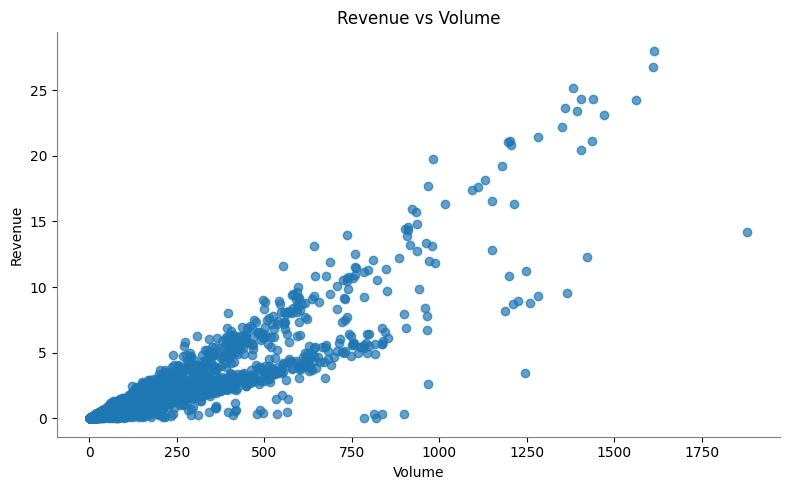

In [23]:
volume_product = df.groupby('Product_ID')['User_ID'].count()
revenue_product = df.groupby('Product_ID')['Purchase'].sum()
revenue_product = revenue_product / 1e6

plt.figure(figsize=(8, 5))
plt.scatter(volume_product, revenue_product, color='#1f77b4', alpha=0.7)
plt.title('Revenue vs Volume')
plt.xlabel('Volume')
plt.ylabel('Revenue')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()

**Revenue vs Volume**

There is a strong positive correlation between product volume and revenue.

**Interpretation:**

The higher the volume, the greater the revenue 


In [24]:
volume_product.corr(revenue_product)

0.8964026626899254

**Interpretation**

The greater the volume, the higher the revenue generated.  
This supports the earlier insight: the 89% correlation between volume and revenue indicates a strong, stable linear relationship with only a few outliers or noise.



**Final Insight and Recommendation**

Based on the insights above:
- Revenue is relatively balanced across the top products  
- Revenue is dominated by Category 1, 5, and 8, which together contribute 75% these may represent Walmart’s core categories  
- Volume and revenue have a strong positive correlation

**Recommendations:**

1. Focus on boosting the top 3 categories  
   Run product campaigns or promotions to increase their visibility and sales.

2. Evaluate pricing strategy for high-volume but low-revenue products 
   For example, P00265242 may benefit from upselling or bundling to raise its revenue impact.

3. Review price differences in similar-volume products  
   Compare P00110742 and P00025442 to understand pricing impact on revenue.

4. Add more visibility to products with growing volume  
   If any product is trending in volume, support it with promotion to convert that into revenue.

5. Monitor outliers over time  
   Keep track of products with unusually high performance — they might become new best sellers or signal shifting demand.